# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Carregando Dados

In [2]:
df = pd.read_csv('dataset/enem_resumo.csv')
df.head()

,NU_IDADE,TP_ESTADO_CIVIL,TP_SEXO,TP_COR_RACA,TP_ANO_CONCLUIU,Q002,Q006,Q025,Q047,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_MEDIA
0,B,0.0,F,3,A,C,E,A,A,463.4,495.9,466.6,457.0,520.0,480.58
1,D,0.0,F,1,D,B,E,B,A,492.6,523.0,538.4,538.7,420.0,502.54
2,D,1.0,M,1,N,E,E,A,A,443.3,511.0,559.8,507.4,420.0,488.30
3,A,0.0,F,3,A,B,E,B,A,480.4,531.6,569.0,456.3,600.0,527.46
4,B,0.0,M,3,N,E,D,A,A,448.5,510.0,508.3,491.8,560.0,503.72


# Analisando o DF

In [3]:
df.isnull().sum()

NU_IDADE              0
TP_ESTADO_CIVIL       0
TP_SEXO               0
TP_COR_RACA           0
TP_ANO_CONCLUIU       0
Q002                  0
Q006                  0
Q025                  0
Q047                  0
NU_NOTA_MT            0
NU_NOTA_LC            0
NU_NOTA_CH         4568
NU_NOTA_CN         4568
NU_NOTA_REDACAO       0
NU_NOTA_MEDIA      4568
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   NU_IDADE         1000000 non-null  object 
 1   TP_ESTADO_CIVIL  1000000 non-null  float64
 2   TP_SEXO          1000000 non-null  object 
 3   TP_COR_RACA      1000000 non-null  int64  
 4   TP_ANO_CONCLUIU  1000000 non-null  object 
 5   Q002             1000000 non-null  object 
 6   Q006             1000000 non-null  object 
 7   Q025             1000000 non-null  object 
 8   Q047             1000000 non-null  object 
 9   NU_NOTA_MT       1000000 non-null  float64
 10  NU_NOTA_LC       1000000 non-null  float64
 11  NU_NOTA_CH       995432 non-null   float64
 12  NU_NOTA_CN       995432 non-null   float64
 13  NU_NOTA_REDACAO  1000000 non-null  float64
 14  NU_NOTA_MEDIA    995432 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 114.4+ MB


In [5]:
df.columns

Index(['NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_SEXO', 'TP_COR_RACA',
       'TP_ANO_CONCLUIU', 'Q002', 'Q006', 'Q025', 'Q047', 'NU_NOTA_MT',
       'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO',
       'NU_NOTA_MEDIA'],
      dtype='object')

## Removendo valores nulos

In [6]:
df = df.dropna(axis = 0)
df = df[df['TP_ANO_CONCLUIU'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_IDADE         995432 non-null  object 
 1   TP_ESTADO_CIVIL  995432 non-null  float64
 2   TP_SEXO          995432 non-null  object 
 3   TP_COR_RACA      995432 non-null  int64  
 4   TP_ANO_CONCLUIU  995432 non-null  object 
 5   Q002             995432 non-null  object 
 6   Q006             995432 non-null  object 
 7   Q025             995432 non-null  object 
 8   Q047             995432 non-null  object 
 9   NU_NOTA_MT       995432 non-null  float64
 10  NU_NOTA_LC       995432 non-null  float64
 11  NU_NOTA_CH       995432 non-null  float64
 12  NU_NOTA_CN       995432 non-null  float64
 13  NU_NOTA_REDACAO  995432 non-null  float64
 14  NU_NOTA_MEDIA    995432 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 121.5+ MB


# Engenharia de Atributos

## Sexo

In [7]:
dic_sexo = {'F': 0, 'M': 1}

df['TP_SEXO'] = df['TP_SEXO'].map(dic_sexo).astype(int)

print(f"{df['TP_SEXO'].unique()} {df[['TP_SEXO']].info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   TP_SEXO  995432 non-null  int32
dtypes: int32(1)
memory usage: 11.4 MB
[0 1] None


## Idade

In [8]:
dic_idade = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 0}

df['NU_IDADE'] = df['NU_IDADE'].map(dic_idade).astype(int)

print(f"{df['NU_IDADE'].unique()} {df[['NU_IDADE']].info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   NU_IDADE  995432 non-null  int32
dtypes: int32(1)
memory usage: 11.4 MB
[3 1 4 2 0] None


## Escolaridade da Mãe

In [9]:
dic_pais = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1, 'H': 0 }

df['Q002'] = df['Q002'].map(dic_pais).astype(int)

print(f"{df['Q002'].unique()} {df[['Q002']].info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Q002    995432 non-null  int32
dtypes: int32(1)
memory usage: 11.4 MB
[5 6 3 4 7 2 1 0] None


## Classe Social

In [10]:
dic_social = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 0}

df['Q006'] = df['Q006'].map(dic_social).astype(int)

print(f"{df['Q006'].unique()} {df[['Q006']].info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Q006    995432 non-null  int32
dtypes: int32(1)
memory usage: 11.4 MB
[0 1 2 3 4] None


## Internet

In [11]:
dic_internet = {'A': 0, 'B': 1}

df['Q025'] = df['Q025'].map(dic_internet).astype(int)

print(f"{df['Q025'].unique()} {df[['Q025']].info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Q025    995432 non-null  int32
dtypes: int32(1)
memory usage: 11.4 MB
[0 1] None


## Ensino Médio

In [12]:
dic_medio = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

df['Q047'] = df['Q047'].map(dic_medio).astype(int)

print(f"{df['Q047'].unique()} {df[['Q047']].info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Q047    995432 non-null  int32
dtypes: int32(1)
memory usage: 11.4 MB
[0 1 3 4 2] None


## Ano de Conclusão

In [13]:
dic_conclusao = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'N': 0}

df.replace(dic_conclusao, inplace=True)

print(f"{df['TP_ANO_CONCLUIU'].unique()} {df[['TP_ANO_CONCLUIU']].info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   TP_ANO_CONCLUIU  995432 non-null  int64
dtypes: int64(1)
memory usage: 15.2 MB
[4 1 0 3 2] None


## Verificando tipo de dados

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_IDADE         995432 non-null  int32  
 1   TP_ESTADO_CIVIL  995432 non-null  float64
 2   TP_SEXO          995432 non-null  int32  
 3   TP_COR_RACA      995432 non-null  int64  
 4   TP_ANO_CONCLUIU  995432 non-null  int64  
 5   Q002             995432 non-null  int32  
 6   Q006             995432 non-null  int32  
 7   Q025             995432 non-null  int32  
 8   Q047             995432 non-null  int32  
 9   NU_NOTA_MT       995432 non-null  float64
 10  NU_NOTA_LC       995432 non-null  float64
 11  NU_NOTA_CH       995432 non-null  float64
 12  NU_NOTA_CN       995432 non-null  float64
 13  NU_NOTA_REDACAO  995432 non-null  float64
 14  NU_NOTA_MEDIA    995432 non-null  float64
dtypes: float64(7), int32(6), int64(2)
memory usage: 98.7 MB


## Estado Civil

In [15]:
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].astype(int)

print(f"{df['TP_ESTADO_CIVIL'].unique()} {df[['TP_ESTADO_CIVIL']].info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995432 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   TP_ESTADO_CIVIL  995432 non-null  int32
dtypes: int32(1)
memory usage: 11.4 MB
[0 1 2 3] None


# Analisando as correlações

- Podemos ver que o atributo Q006, Q007, Q025, Q047

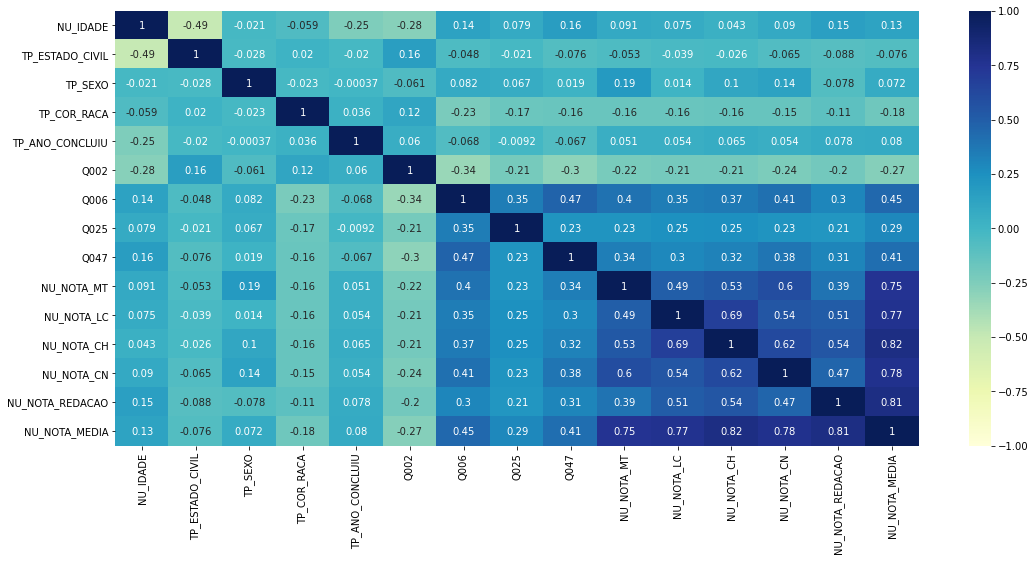

In [16]:
plt.figure(figsize = (18,8))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap="YlGnBu") 
plt.show() 

# Regressão Linear Múltipla e Validação Cruzada

In [17]:
def validation(col, subset = None):
    lista = [    
        'NU_NOTA_MT',
        'NU_NOTA_LC',
        'NU_NOTA_CH',
        'NU_NOTA_CN',
        'NU_NOTA_REDACAO',
        'NU_NOTA_MEDIA'
    ]
    
    if subset is None:
        X = df.drop(columns=lista)
        y = df[col]
    else:
        X = subset.drop(columns=lista)
        y = subset[col]


     
    lm = LinearRegression()
    scores = cross_val_score(lm, X,y, scoring='r2', cv=10)
    r2 = scores.mean()
    
    scores = cross_val_score(lm, X,y, scoring='neg_mean_absolute_error', cv=10)
    mae = scores.mean()
    
    scores = cross_val_score(lm, X,y, scoring='neg_mean_squared_error', cv=10)
    mse = scores.mean()

    print(f"r2: {r2:.2f} | mae: {mae:.2f} | mse: {mse:.2f}")

In [18]:
subset =  df[[
                'Q006', 'Q025', 'Q047',
                'NU_NOTA_MEDIA',
                'NU_NOTA_MT',
                'NU_NOTA_LC',
                'NU_NOTA_CH',
                'NU_NOTA_CN',
                'NU_NOTA_REDACAO'
             ]]

## Prever a Nota de Matemática

In [46]:
validation('NU_NOTA_MT')
validation('NU_NOTA_MT', subset)

r2: 0.24 | mae: -71.31 | mse: -8156.24
r2: 0.20 | mae: -73.20 | mse: -8579.93


## Prever a Nota de Linguagens e Códigos

In [19]:
validation('NU_NOTA_LC')
validation('NU_NOTA_LC', subset)

r2: 0.17 | mae: -49.76 | mse: -3903.22
r2: 0.16 | mae: -50.26 | mse: -3972.84


## Prever a Nota de Ciências Humanas

In [20]:
validation('NU_NOTA_CH')
validation('NU_NOTA_CH', subset)

r2: 0.20 | mae: -52.84 | mse: -4411.94
r2: 0.18 | mae: -53.56 | mse: -4520.76


## Prever a Nota de Ciências da Natureza

In [21]:
validation('NU_NOTA_CN')
validation('NU_NOTA_CN', subset)

r2: 0.25 | mae: -50.61 | mse: -4005.50
r2: 0.22 | mae: -51.50 | mse: -4141.82


## Prever a Nota da Redação

In [22]:
validation('NU_NOTA_REDACAO')
validation('NU_NOTA_REDACAO', subset)

r2: 0.17 | mae: -102.49 | mse: -19515.30
r2: 0.14 | mae: -104.47 | mse: -20366.35


## Prever a Nota Média

In [23]:
validation('NU_NOTA_MEDIA')
validation('NU_NOTA_MEDIA', subset)

r2: 0.30 | mae: -48.77 | mse: -3900.58
r2: 0.27 | mae: -49.66 | mse: -4046.84
